In [1]:
from helper import*
import params as cfg

In [2]:
#   Group-Task-Time
M11 = ['m11_1.zip','m11_2.zip','m11_3.zip','m11_4.zip','m11_5.zip']
M21 = ['m21_1.zip','m21_2.zip','m21_3.zip','m21_4.zip','m21_5.zip']
M12 = ['m12_1.zip','m12_2.zip','m12_3.zip','m12_4.zip','m12_5.zip']
M22 = ['m22_1.zip','m22_2.zip','m22_3.zip','m22_4.zip','m22_5.zip']
C11 = ['c11_1.zip','c11_2.zip','c11_3.zip','c11_4.zip','c11_5.zip']
C21 = ['c21_1.zip','c21_2.zip','c21_3.zip','c21_4.zip','c21_5.zip']
C12 = ['c12_1.zip','c12_2.zip','c12_3.zip','c12_4.zip','c12_5.zip']
C22 = ['c22_1.zip','c22_2.zip','c22_3.zip','c22_4.zip','c22_5.zip']
localDir = "/Users/joshuaighalo/Downloads/Mind_Monitor/"
destDir = "/Users/joshuaighalo/Downloads/Mind_Monitor/dest/"
os.system('rm -rf %s/*' % destDir)
fs_setting = 'constant'

In [3]:
"Functions utilized in this script"
def multipleFilesICA(input_3d,fs):
    ica_out = []
    for i in range(input_3d.shape[0]):
        ica_out.append(ica(input_3d[i,:,:],fs))
    return np.array(ica_out)
def multipleFilesNotch(input_3d,fs):
    notch_out = []
    filtering = filters()
    for i in range(input_3d.shape[0]):
        notch_out.append(filtering.notch(input_3d[i,:,:],fs))
    return np.array(notch_out)
def pk2pk(input,threshold):
    def fnc(data,threshold_):
        data[np.where(abs(data) > threshold_)] = 0
        return data
    p1 = fnc(input[:,0],threshold[0])
    p2 = fnc(input[:,1],threshold[1])
    p3 = fnc(input[:,2],threshold[2])
    p4 = fnc(input[:,3],threshold[3])
    return np.array([p1,p2,p3,p4]).T
def multipleFilesbutterBandpass(input_3d,lowcut,highcut,fs):
    butter_out = []
    filtering = filters()
    for i in range(input_3d.shape[0]):
        butter_out.append(filtering.butterBandPass(input_3d[i,:,:],lowcut,highcut,fs))
    return np.array(butter_out)

In [4]:
#   Extract eeg data fro participants within the groups
M11 = zipExtract(M11,localDir,destDir,"M11",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
M21 = zipExtract(M21,localDir,destDir,"M21",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
M12 = zipExtract(M12,localDir,destDir,"M12",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
M22 = zipExtract(M22,localDir,destDir,"M22",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C11 = zipExtract(C11,localDir,destDir,"C11",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C21 = zipExtract(C21,localDir,destDir,"C21",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C12 = zipExtract(C12,localDir,destDir,"C12",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C22 = zipExtract(C22,localDir,destDir,"C22",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
time_s = np.arange(0,cfg.collection_time,1/cfg.fs)

In [5]:
#   Notch filters data collected from participants
noc_M11 = multipleFilesNotch(M11,cfg.fs)
noc_M21 = multipleFilesNotch(M21,cfg.fs)
noc_M12 = multipleFilesNotch(M12,cfg.fs)
noc_M22 = multipleFilesNotch(M22,cfg.fs)
noc_C11 = multipleFilesNotch(C11,cfg.fs)
noc_C21 = multipleFilesNotch(C21,cfg.fs)
noc_C12 = multipleFilesNotch(C12,cfg.fs)
noc_C22 = multipleFilesNotch(C22,cfg.fs)

In [6]:
#   Bandpass filters data collected from participants
band_M11 = multipleFilesbutterBandpass(noc_M11,cfg.lowcut,cfg.highcut,cfg.fs)
band_M21 = multipleFilesbutterBandpass(noc_M21,cfg.lowcut,cfg.highcut,cfg.fs)
band_M12 = multipleFilesbutterBandpass(noc_M12,cfg.lowcut,cfg.highcut,cfg.fs)
band_M22 = multipleFilesbutterBandpass(noc_M22,cfg.lowcut,cfg.highcut,cfg.fs)
band_C11 = multipleFilesbutterBandpass(noc_C11,cfg.lowcut,cfg.highcut,cfg.fs)
band_C21 = multipleFilesbutterBandpass(noc_C21,cfg.lowcut,cfg.highcut,cfg.fs)
band_C12 = multipleFilesbutterBandpass(noc_C12,cfg.lowcut,cfg.highcut,cfg.fs)
band_C22 = multipleFilesbutterBandpass(noc_C22,cfg.lowcut,cfg.highcut,cfg.fs)

In [7]:
#   ICA filters data collected from participants
ica_M11 = multipleFilesICA(band_M11,cfg.fs)
ica_M11_1,ica_M11_2,ica_M11_3,ica_M11_4,ica_M11_5 = ica_M11[0],ica_M11[1],ica_M11[2],ica_M11[3],ica_M11[4]
ica_M21 = multipleFilesICA(band_M21,cfg.fs)
ica_M21_1,ica_M21_2,ica_M21_3,ica_M21_4,ica_M21_5 = ica_M21[0],ica_M21[1],ica_M21[2],ica_M21[3],ica_M21[4]
ica_M12 = multipleFilesICA(band_M12,cfg.fs)
ica_M12_1,ica_M12_2,ica_M12_3,ica_M12_4,ica_M12_5 = ica_M12[0],ica_M12[1],ica_M12[2],ica_M12[3],ica_M12[4]
ica_M22 = multipleFilesICA(band_M22,cfg.fs)
ica_M22_1,ica_M22_2,ica_M22_3,ica_M22_4,ica_M22_5 = ica_M22[0],ica_M22[1],ica_M22[2],ica_M22[3],ica_M22[4]
ica_C11 = multipleFilesICA(band_C11,cfg.fs)
ica_C11_1,ica_C11_2,ica_C11_3,ica_C11_4,ica_C11_5 = ica_C11[0],ica_C11[1],ica_C11[2],ica_C11[3],ica_C11[4]
ica_C21 = multipleFilesICA(band_C21,cfg.fs)
ica_C21_1,ica_C21_2,ica_C21_3,ica_C21_4,ica_C21_5 = ica_C21[0],ica_C21[1],ica_C21[2],ica_C21[3],ica_C21[4]
ica_C12 = multipleFilesICA(band_C12,cfg.fs)
ica_C12_1,ica_C12_2,ica_C12_3,ica_C12_4,ica_C12_5 = ica_C12[0],ica_C12[1],ica_C12[2],ica_C12[3],ica_C12[4]
ica_C22 = multipleFilesICA(band_C22,cfg.fs)
ica_C22_1,ica_C22_2,ica_C22_3,ica_C22_4,ica_C22_5 = ica_C22[0],ica_C22[1],ica_C22[2],ica_C22[3],ica_C22[4]

In [35]:
def manArtfRemoval(wins,idxs):

    def plotss(y,figsize,main_title):
        if len(y) % 2 != 0:
            nrows,ncols=int(len(y)),1
        elif len(y) % 2 == 0:
            nrows,ncols=5,int(len(y)/5)
        fig, axs = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=(figsize[0],figsize[1]))
        titles = np.arange(0,len(y),1)
        fig.suptitle(main_title)
        for i, axs in enumerate(axs.flatten()):
            axs.plot(y[i])
            axs.set_title(titles[i])
            axs.set(ylabel='Amplitude (uV)')
            axs.tick_params(axis='both', which='major', labelsize=8)
            axs.label_outer()

    def setZeros(input,index):
        def params(data):
            return np.zeros(len(data.T))
        zeros = []
        for i in range(len(index)):
            zeros.append(params(input[index[i]]))
        zeros = np.array(zeros)
        return zeros

    plotss(wins,(50,40),'Pre-Removal')
    zeroComps = setZeros(wins,idxs)
    for i in range(len(idxs)):
        idx_rejected_comps = np.arange(len(zeroComps))
        wins[idxs[i]] = zeroComps[idx_rejected_comps[i]]
    plotss(wins,(50,40),'Post-Removal')
    return wins


M11_1

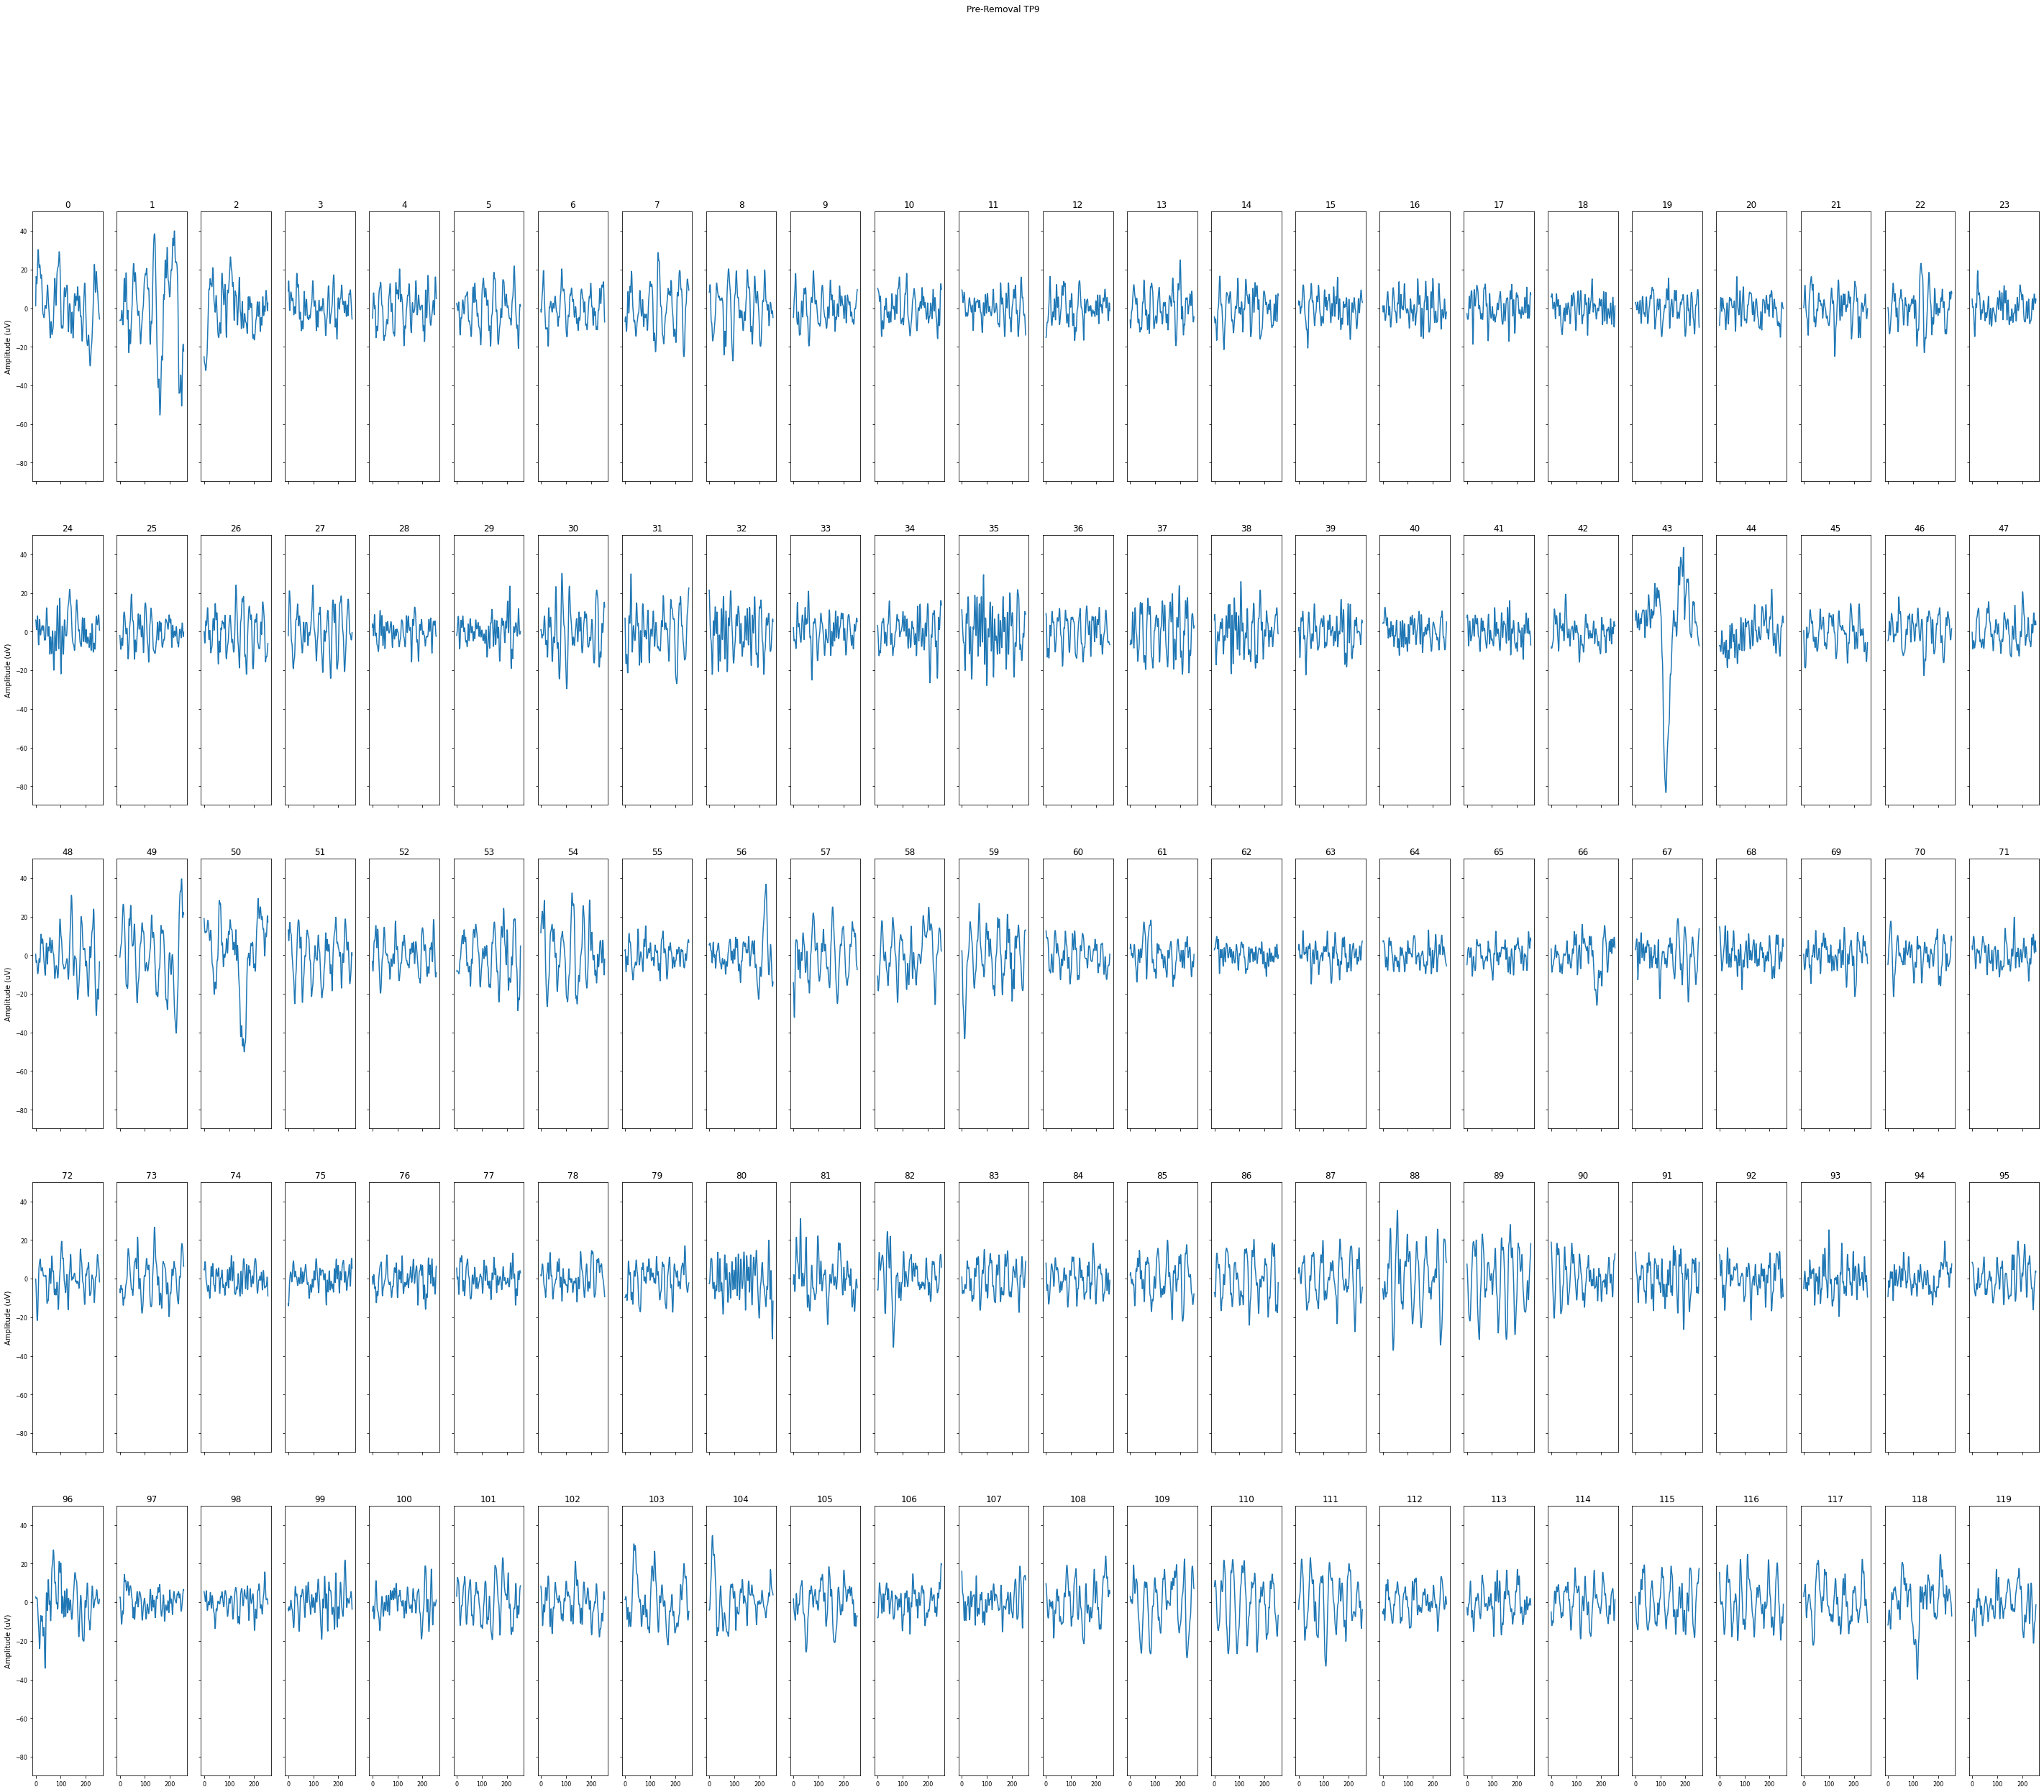

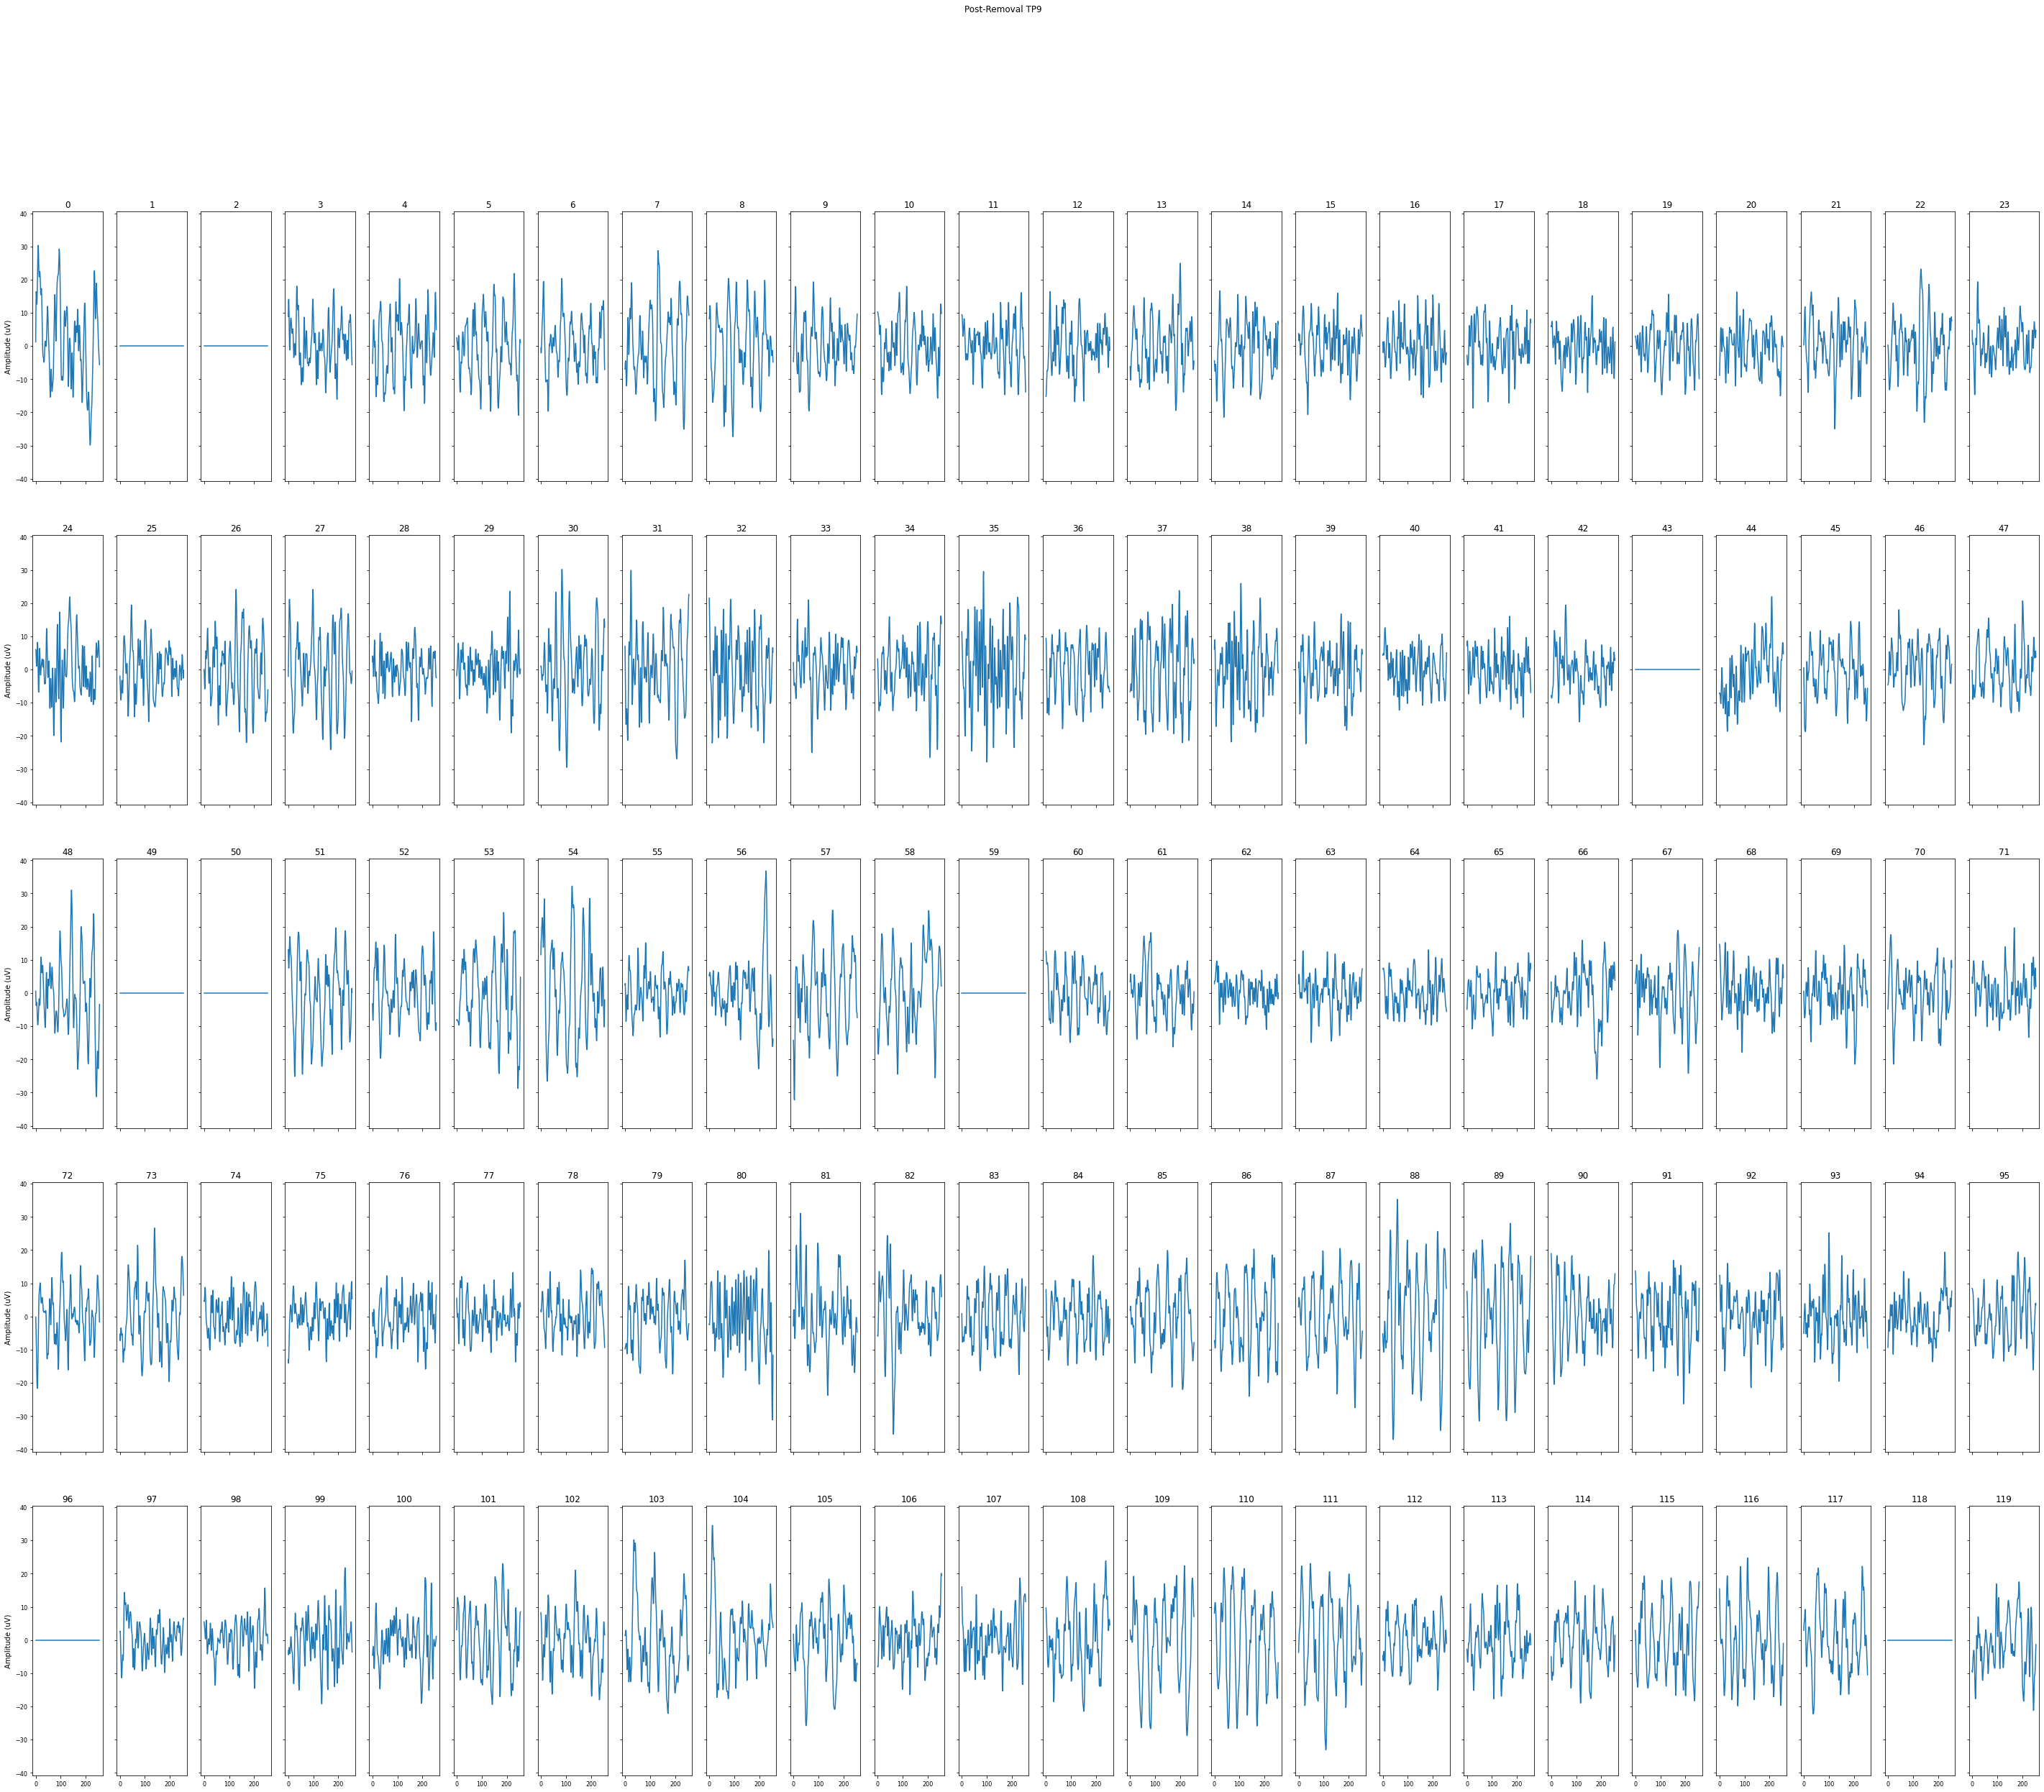

In [34]:
wins = slidingWindow(ica_M11_1,time_s,1,1)
wins_TP9 = wins[0]
wins_AF7 = wins[1]
wins_AF8 = wins[2]
wins_TP10 = wins[3]

#   Identify artefacts
rem_


In [ ]:
args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M11_1','timeFrequencyDomainPlots':True}
plots(ica_M11_1,time_s,**args)

In [ ]:
pk_M11_1 = pk2pk(ica_M11_1,[25,12,5,25])
args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M11_1','timeFrequencyDomainPlots':True}
plots(pk_M11_1,time_s,**args)

M11_2

In [ ]:
args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M11_1','timeFrequencyDomainPlots':True}
plots(ica_M11_2,time_s,**args)

In [ ]:
pk_M11_2 = pk2pk(ica_M11_2,[20,16,16,4])
args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M11_1','timeFrequencyDomainPlots':True}
plots(pk_M11_2,time_s,**args)

M11_3

In [ ]:
args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M11_1','timeFrequencyDomainPlots':True}
plots(ica_M11_3,time_s,**args)

In [ ]:
pk_M11_3 = pk2pk(ica_M11_3,[30,22,5,30])
args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M11_1','timeFrequencyDomainPlots':True}
plots(pk_M11_3,time_s,**args)

M11_4

In [ ]:
args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M11_1','timeFrequencyDomainPlots':True}
plots(ica_M11_4,time_s,**args)

In [ ]:
pk_M11_4 = pk2pk(ica_M11_4,[6,20,6,50])
args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M11_1','timeFrequencyDomainPlots':True}
plots(pk_M11_4,time_s,**args)

M11_5

In [ ]:
args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M11_1','timeFrequencyDomainPlots':True}
plots(ica_M11_5,time_s,**args)

In [ ]:
pk_M11_5 = pk2pk(ica_M11_5,[30,3,20,30])
args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M11_1','timeFrequencyDomainPlots':True}
plots(pk_M11_5,time_s,**args)

M11_AVERAGE

In [ ]:
pk_M11 = np.stack((pk_M11_1,pk_M11_2,pk_M11_3,pk_M11_4,pk_M11_5),axis=0)
pk_M11_Avg = np.mean(pk_M11,axis=0)
args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M11 Average','timeFrequencyDomainPlots':True}
plots(pk_M11_Avg,time_s,**args)

M12_1

In [ ]:
args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M21_1','timeFrequencyDomainPlots':True}
plots(ica_M21_1,time_s,**args)

In [ ]:
pk_M21_1 = pk2pk(ica_M21_1,[25,2.5,3,35])
args = {'fs':cfg.fs,'figsize':(20,8),'subTitles':['TP9','AF7','AF8','TP10'],'title':'M21_1','timeFrequencyDomainPlots':True}
plots(pk_M21_1,time_s,**args)